In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Cargar el archivo CSV
csv_path = "Barcelona_NoNulos.csv"  # Asegurar que esté en el mismo directorio de ejecución
df = pd.read_csv(csv_path)
df.head()

,neighbourhood_cleansed,review_scores_cleanliness,host_is_superhost,description,review_scores_checkin,name,availability_60,host_total_listings_count,host_verifications,instant_bookable,...,minimum_nights,neighbourhood,first_review,availability_365,calculated_host_listings_count,price,last_review,review_scores_accuracy,bathrooms_text,longitude
0,la Sagrada Família,4.61,f,110m2 apartment to rent in Barcelona. Located ...,4.76,Huge flat for 8 people close to Sagrada Familia,19,48.0,"['email', 'phone']",t,...,1,"Barcelona, CT, Spain",2013-05-27,72,28,194.0,2024-06-03,4.46,2 baths,2.17262
1,el Besòs i el Maresme,4.90,t,"Beautiful spacious apartment, large terrace, 5...",4.94,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",28,13.0,"['email', 'phone']",f,...,3,"Sant Adria de Besos, Barcelona, Spain",2011-03-15,116,1,304.0,2024-06-24,4.94,2 baths,2.21975
2,el Camp d'en Grassot i Gràcia Nova,4.40,f,A lovely two bedroom apartment only 250 m from...,4.89,Sagrada Familia area - Còrsega 1,20,15.0,"['email', 'phone', 'work_email']",f,...,1,"Barcelona, Catalonia, Spain",2011-07-17,319,3,211.0,2024-09-05,4.45,1.5 baths,2.17015
3,el Barri Gòtic,4.59,f,Located in close proximity to Plaza Real and L...,4.59,Stylish Top Floor Apartment - Ramblas Plaza Real,39,4.0,"['email', 'phone', 'work_email']",f,...,5,Desconocido,2010-07-10,69,3,300.0,2024-08-20,4.59,1 bath,2.17517
4,el Barri Gòtic,4.64,f,Spacious apartment for large families or group...,4.67,VIDRE HOME PLAZA REAL on LAS RAMBLAS,35,4.0,"['email', 'phone', 'work_email']",f,...,5,"Barcelona, Catalonia, Spain",2010-10-03,241,3,314.0,2024-09-02,4.59,3 baths,2.17623


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   neighbourhood_cleansed                        19482 non-null  object 
 1   review_scores_cleanliness                     19482 non-null  float64
 2   host_is_superhost                             19482 non-null  object 
 3   description                                   19482 non-null  object 
 4   review_scores_checkin                         19482 non-null  float64
 5   name                                          19482 non-null  object 
 6   availability_60                               19482 non-null  int64  
 7   host_total_listings_count                     19482 non-null  float64
 8   host_verifications                            19482 non-null  object 
 9   instant_bookable                              19482 non-null 

In [15]:
valores_nulos=df.isnull().sum()
valores_nulos

,0
neighbourhood_cleansed,0
review_scores_cleanliness,0
host_is_superhost,0
description,0
review_scores_checkin,0
name,0
availability_60,0
host_total_listings_count,0
host_verifications,0
instant_bookable,0


In [17]:
# *Creo 2 dataframes para procesar outliers*

# Seleccionar solo las columnas numéricas del dataset
columnas_cuantitativas = [
    'review_scores_cleanliness', 'review_scores_checkin',
    'availability_60', 'host_total_listings_count', 'maximum_nights',
    'review_scores_communication', 'beds', 'calculated_host_listings_count_entire_homes',
    'review_scores_rating', 'number_of_reviews', 'bedrooms',
    'calculated_host_listings_count_private_rooms', 'number_of_reviews_l30d',
    'review_scores_value', 'availability_30', 'review_scores_location',
    'availability_90', 'accommodates', 'host_listings_count',
    'number_of_reviews_ltm', 'latitude', 'minimum_nights',
    'availability_365', 'calculated_host_listings_count',
    'price', 'review_scores_accuracy', 'longitude'
]

cuantitativas = df[columnas_cuantitativas]  # Filtrar solo las columnas numéricas
cualitativas = df.iloc[:, [0]]  # Manteniendo la primera columna como cualitativa


In [18]:
cuantitativas

,review_scores_cleanliness,review_scores_checkin,availability_60,host_total_listings_count,maximum_nights,review_scores_communication,beds,calculated_host_listings_count_entire_homes,review_scores_rating,number_of_reviews,...,accommodates,host_listings_count,number_of_reviews_ltm,latitude,minimum_nights,availability_365,calculated_host_listings_count,price,review_scores_accuracy,longitude
0,4.610000,4.7600,19,48.0,1125,4.680000,6.0,28,4.370000,42,...,8,43.0,3,41.405560,1,72,28,194.0,4.460000,2.172620
1,4.900000,4.9400,28,13.0,32,4.990000,4.0,1,4.790000,79,...,5,6.0,7,41.412432,3,116,1,304.0,4.940000,2.219750
2,4.400000,4.8900,20,15.0,31,4.880000,3.0,3,4.460000,128,...,6,3.0,32,41.405660,1,319,3,211.0,4.450000,2.170150
3,4.590000,4.5900,39,4.0,120,4.820000,1.0,3,4.470000,20,...,2,4.0,12,41.380620,5,69,3,300.0,4.590000,2.175170
4,4.640000,4.6700,35,4.0,365,4.700000,6.0,3,4.530000,247,...,9,4.0,37,41.379780,5,241,3,314.0,4.590000,2.176230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,4.605956,4.7174,54,30.0,365,4.713566,2.0,0,4.587361,0,...,3,19.0,0,41.380450,3,359,19,105.0,4.639845,2.164980
19478,4.605956,4.7174,51,30.0,365,4.713566,1.0,0,4.587361,0,...,2,19.0,0,41.380551,3,356,19,65.0,4.639845,2.164990
19479,4.605956,4.7174,33,30.0,365,4.713566,2.0,0,4.587361,0,...,3,19.0,0,41.382344,3,338,19,80.0,4.639845,2.164517
19480,4.605956,4.7174,20,6.0,15,4.713566,1.0,0,4.587361,0,...,2,6.0,0,41.386875,3,20,6,85.0,4.639845,2.178370


In [19]:
cualitativas

,neighbourhood_cleansed
0,la Sagrada Família
1,el Besòs i el Maresme
2,el Camp d'en Grassot i Gràcia Nova
3,el Barri Gòtic
4,el Barri Gòtic
...,...
19477,el Raval
19478,el Raval
19479,el Raval
19480,"Sant Pere, Santa Caterina i la Ribera"


<Figure size 1500x800 with 0 Axes>

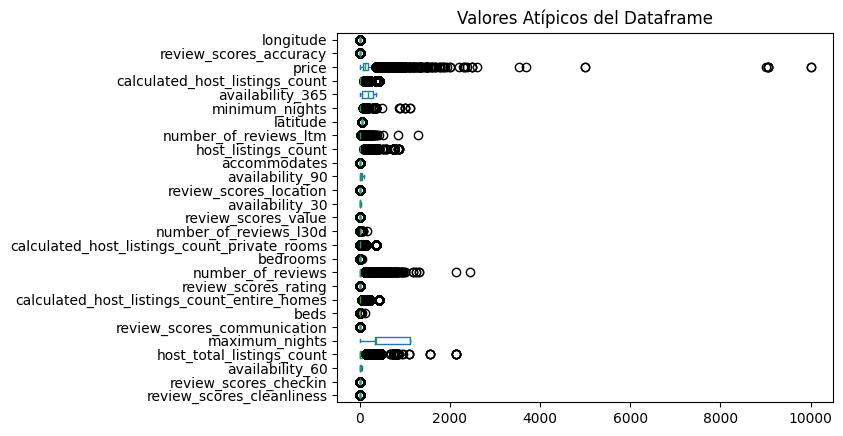

In [20]:
#Realizamos cada diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False) #cuantitativas["nombre_columna"].plot()
plt.title("Valores Atípicos del Dataframe")
plt.show()

# ***Procedimiento desviacion estandar para eliminar outliers***

In [21]:
#Encuentro los valores extremos
y=cuantitativas
Limite_Superior=y.mean()+3*y.std()
Limite_Inferior=y.mean()-3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido review_scores_cleanliness                          5.923546
review_scores_checkin                              5.933457
availability_60                                   79.095669
host_total_listings_count                        537.761552
maximum_nights                                  1778.251562
review_scores_communication                        5.972175
beds                                               8.081057
calculated_host_listings_count_entire_homes      257.651912
review_scores_rating                               5.908482
number_of_reviews                                345.658098
bedrooms                                           5.285421
calculated_host_listings_count_private_rooms     163.308063
number_of_reviews_l30d                             8.608931
review_scores_value                                5.912983
availability_30                                   35.021444
review_scores_location                             5.725593
availability_9

In [22]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data3=cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,review_scores_cleanliness,review_scores_checkin,availability_60,host_total_listings_count,maximum_nights,review_scores_communication,beds,calculated_host_listings_count_entire_homes,review_scores_rating,number_of_reviews,...,accommodates,host_listings_count,number_of_reviews_ltm,latitude,minimum_nights,availability_365,calculated_host_listings_count,price,review_scores_accuracy,longitude
0,4.610000,4.7600,19,48.0,1125,4.680000,6.0,28.0,4.370000,42.0,...,8.0,43.0,3.0,41.405560,1.0,72,28.0,194.0,4.460000,2.172620
1,4.900000,4.9400,28,13.0,32,4.990000,4.0,1.0,4.790000,79.0,...,5.0,6.0,7.0,41.412432,3.0,116,1.0,304.0,4.940000,2.219750
2,4.400000,4.8900,20,15.0,31,4.880000,3.0,3.0,4.460000,128.0,...,6.0,3.0,32.0,41.405660,1.0,319,3.0,211.0,4.450000,2.170150
3,4.590000,4.5900,39,4.0,120,4.820000,1.0,3.0,4.470000,20.0,...,2.0,4.0,12.0,41.380620,5.0,69,3.0,300.0,4.590000,2.175170
4,4.640000,4.6700,35,4.0,365,4.700000,6.0,3.0,4.530000,247.0,...,9.0,4.0,37.0,41.379780,5.0,241,3.0,314.0,4.590000,2.176230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,4.605956,4.7174,54,30.0,365,4.713566,2.0,0.0,4.587361,0.0,...,3.0,19.0,0.0,41.380450,3.0,359,19.0,105.0,4.639845,2.164980
19478,4.605956,4.7174,51,30.0,365,4.713566,1.0,0.0,4.587361,0.0,...,2.0,19.0,0.0,41.380551,3.0,356,19.0,65.0,4.639845,2.164990
19479,4.605956,4.7174,33,30.0,365,4.713566,2.0,0.0,4.587361,0.0,...,3.0,19.0,0.0,41.382344,3.0,338,19.0,80.0,4.639845,2.164517
19480,4.605956,4.7174,20,6.0,15,4.713566,1.0,0.0,4.587361,0.0,...,2.0,6.0,0.0,41.386875,3.0,20,6.0,85.0,4.639845,2.178370


In [23]:
#corroboramos valores nulos del datafrem
valores_nulos=data3.isnull().sum()
valores_nulos

,0
review_scores_cleanliness,419
review_scores_checkin,412
availability_60,0
host_total_listings_count,476
maximum_nights,0
review_scores_communication,388
beds,152
calculated_host_listings_count_entire_homes,437
review_scores_rating,412
number_of_reviews,480


In [24]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,review_scores_cleanliness,review_scores_checkin,availability_60,host_total_listings_count,maximum_nights,review_scores_communication,beds,calculated_host_listings_count_entire_homes,review_scores_rating,number_of_reviews,...,accommodates,host_listings_count,number_of_reviews_ltm,latitude,minimum_nights,availability_365,calculated_host_listings_count,price,review_scores_accuracy,longitude
0,4.610000,4.7600,19,48.0,1125,4.680000,6.0,28.0,4.370000,42.0,...,8.0,43.0,3.0,41.405560,1.0,72,28.0,194.0,4.460000,2.172620
1,4.900000,4.9400,28,13.0,32,4.990000,4.0,1.0,4.790000,79.0,...,5.0,6.0,7.0,41.412432,3.0,116,1.0,304.0,4.940000,2.219750
2,4.400000,4.8900,20,15.0,31,4.880000,3.0,3.0,4.460000,128.0,...,6.0,3.0,32.0,41.405660,1.0,319,3.0,211.0,4.450000,2.170150
3,4.590000,4.5900,39,4.0,120,4.820000,1.0,3.0,4.470000,20.0,...,2.0,4.0,12.0,41.380620,5.0,69,3.0,300.0,4.590000,2.175170
4,4.640000,4.6700,35,4.0,365,4.700000,6.0,3.0,4.530000,247.0,...,9.0,4.0,37.0,41.379780,5.0,241,3.0,314.0,4.590000,2.176230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,4.605956,4.7174,54,30.0,365,4.713566,2.0,0.0,4.587361,0.0,...,3.0,19.0,0.0,41.380450,3.0,359,19.0,105.0,4.639845,2.164980
19478,4.605956,4.7174,51,30.0,365,4.713566,1.0,0.0,4.587361,0.0,...,2.0,19.0,0.0,41.380551,3.0,356,19.0,65.0,4.639845,2.164990
19479,4.605956,4.7174,33,30.0,365,4.713566,2.0,0.0,4.587361,0.0,...,3.0,19.0,0.0,41.382344,3.0,338,19.0,80.0,4.639845,2.164517
19480,4.605956,4.7174,20,6.0,15,4.713566,1.0,0.0,4.587361,0.0,...,2.0,6.0,0.0,41.386875,3.0,20,6.0,85.0,4.639845,2.178370


In [25]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

,0
review_scores_cleanliness,0
review_scores_checkin,0
availability_60,0
host_total_listings_count,0
maximum_nights,0
review_scores_communication,0
beds,0
calculated_host_listings_count_entire_homes,0
review_scores_rating,0
number_of_reviews,0


# ***Procedimiento cuartiles para sustituir valores atipicos***

In [26]:
#metodo aplicando Cuartiles. Encuentro cuartiles 0.25 7 0.75
y=cuantitativas
percentile25=y.quantile(0.25)#q1
percentile75=y.quantile(0.75)#q3
iqr=percentile75-percentile25

Limite_Inferior_iqr=percentile25-(1.5*iqr)
Limite_Superior_iqr=percentile75+(1.5*iqr)
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)


Limite superior permitido review_scores_cleanliness                          5.305000
review_scores_checkin                              5.298900
availability_60                                   87.500000
host_total_listings_count                        130.500000
maximum_nights                                  2317.500000
review_scores_communication                        5.304651
beds                                               6.000000
calculated_host_listings_count_entire_homes       47.500000
review_scores_rating                               5.283750
number_of_reviews                                118.500000
bedrooms                                           3.500000
calculated_host_listings_count_private_rooms       5.000000
number_of_reviews_l30d                             2.500000
review_scores_value                                5.175000
availability_30                                   30.000000
review_scores_location                             5.215000
availability_9

In [27]:
#Obtenemos datos limpios del Dataframe
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,review_scores_cleanliness,review_scores_checkin,availability_60,host_total_listings_count,maximum_nights,review_scores_communication,beds,calculated_host_listings_count_entire_homes,review_scores_rating,number_of_reviews,...,accommodates,host_listings_count,number_of_reviews_ltm,latitude,minimum_nights,availability_365,calculated_host_listings_count,price,review_scores_accuracy,longitude
0,4.610000,4.7600,19,48.0,1125,4.680000,6.0,28.0,4.370000,42.0,...,NaN,43.0,3.0,41.405560,1.0,72,28.0,194.0,4.460000,2.172620
1,4.900000,4.9400,28,13.0,32,4.990000,4.0,1.0,4.790000,79.0,...,5.0,6.0,7.0,41.412432,3.0,116,1.0,304.0,4.940000,NaN
2,4.400000,4.8900,20,15.0,31,4.880000,3.0,3.0,4.460000,NaN,...,6.0,3.0,32.0,41.405660,1.0,319,3.0,211.0,4.450000,2.170150
3,4.590000,4.5900,39,4.0,120,4.820000,1.0,3.0,4.470000,20.0,...,2.0,4.0,12.0,41.380620,5.0,69,3.0,300.0,4.590000,2.175170
4,4.640000,4.6700,35,4.0,365,4.700000,6.0,3.0,4.530000,NaN,...,NaN,4.0,37.0,41.379780,5.0,241,3.0,314.0,4.590000,2.176230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,4.605956,4.7174,54,30.0,365,4.713566,2.0,0.0,4.587361,0.0,...,3.0,19.0,0.0,41.380450,3.0,359,19.0,105.0,4.639845,2.164980
19478,4.605956,4.7174,51,30.0,365,4.713566,1.0,0.0,4.587361,0.0,...,2.0,19.0,0.0,41.380551,3.0,356,19.0,65.0,4.639845,2.164990
19479,4.605956,4.7174,33,30.0,365,4.713566,2.0,0.0,4.587361,0.0,...,3.0,19.0,0.0,41.382344,3.0,338,19.0,80.0,4.639845,2.164517
19480,4.605956,4.7174,20,6.0,15,4.713566,1.0,0.0,4.587361,0.0,...,2.0,6.0,0.0,41.386875,3.0,20,6.0,85.0,4.639845,2.178370


In [28]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

,0
review_scores_cleanliness,1727
review_scores_checkin,1681
availability_60,0
host_total_listings_count,3202
maximum_nights,0
review_scores_communication,1632
beds,439
calculated_host_listings_count_entire_homes,2625
review_scores_rating,1584
number_of_reviews,2414


In [29]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,review_scores_cleanliness,review_scores_checkin,availability_60,host_total_listings_count,maximum_nights,review_scores_communication,beds,calculated_host_listings_count_entire_homes,review_scores_rating,number_of_reviews,...,accommodates,host_listings_count,number_of_reviews_ltm,latitude,minimum_nights,availability_365,calculated_host_listings_count,price,review_scores_accuracy,longitude
0,4.610000,4.7600,19,48.0,1125,4.680000,6.0,28.0,4.370000,42.0,...,3.0,43.0,3.0,41.405560,1.0,72,28.0,194.0,4.460000,2.172620
1,4.900000,4.9400,28,13.0,32,4.990000,4.0,1.0,4.790000,79.0,...,5.0,6.0,7.0,41.412432,3.0,116,1.0,304.0,4.940000,2.200000
2,4.400000,4.8900,20,15.0,31,4.880000,3.0,3.0,4.460000,18.0,...,6.0,3.0,32.0,41.405660,1.0,319,3.0,211.0,4.450000,2.170150
3,4.590000,4.5900,39,4.0,120,4.820000,1.0,3.0,4.470000,20.0,...,2.0,4.0,12.0,41.380620,5.0,69,3.0,300.0,4.590000,2.175170
4,4.640000,4.6700,35,4.0,365,4.700000,6.0,3.0,4.530000,18.0,...,3.0,4.0,37.0,41.379780,5.0,241,3.0,314.0,4.590000,2.176230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,4.605956,4.7174,54,30.0,365,4.713566,2.0,0.0,4.587361,0.0,...,3.0,19.0,0.0,41.380450,3.0,359,19.0,105.0,4.639845,2.164980
19478,4.605956,4.7174,51,30.0,365,4.713566,1.0,0.0,4.587361,0.0,...,2.0,19.0,0.0,41.380551,3.0,356,19.0,65.0,4.639845,2.164990
19479,4.605956,4.7174,33,30.0,365,4.713566,2.0,0.0,4.587361,0.0,...,3.0,19.0,0.0,41.382344,3.0,338,19.0,80.0,4.639845,2.164517
19480,4.605956,4.7174,20,6.0,15,4.713566,1.0,0.0,4.587361,0.0,...,2.0,6.0,0.0,41.386875,3.0,20,6.0,85.0,4.639845,2.178370


In [30]:
#Unimos el datframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios=pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,neighbourhood_cleansed,review_scores_cleanliness,review_scores_checkin,availability_60,host_total_listings_count,maximum_nights,review_scores_communication,beds,calculated_host_listings_count_entire_homes,review_scores_rating,...,accommodates,host_listings_count,number_of_reviews_ltm,latitude,minimum_nights,availability_365,calculated_host_listings_count,price,review_scores_accuracy,longitude
0,la Sagrada Família,4.610000,4.7600,19,48.0,1125,4.680000,6.0,28.0,4.370000,...,3.0,43.0,3.0,41.405560,1.0,72,28.0,194.0,4.460000,2.172620
1,el Besòs i el Maresme,4.900000,4.9400,28,13.0,32,4.990000,4.0,1.0,4.790000,...,5.0,6.0,7.0,41.412432,3.0,116,1.0,304.0,4.940000,2.200000
2,el Camp d'en Grassot i Gràcia Nova,4.400000,4.8900,20,15.0,31,4.880000,3.0,3.0,4.460000,...,6.0,3.0,32.0,41.405660,1.0,319,3.0,211.0,4.450000,2.170150
3,el Barri Gòtic,4.590000,4.5900,39,4.0,120,4.820000,1.0,3.0,4.470000,...,2.0,4.0,12.0,41.380620,5.0,69,3.0,300.0,4.590000,2.175170
4,el Barri Gòtic,4.640000,4.6700,35,4.0,365,4.700000,6.0,3.0,4.530000,...,3.0,4.0,37.0,41.379780,5.0,241,3.0,314.0,4.590000,2.176230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,el Raval,4.605956,4.7174,54,30.0,365,4.713566,2.0,0.0,4.587361,...,3.0,19.0,0.0,41.380450,3.0,359,19.0,105.0,4.639845,2.164980
19478,el Raval,4.605956,4.7174,51,30.0,365,4.713566,1.0,0.0,4.587361,...,2.0,19.0,0.0,41.380551,3.0,356,19.0,65.0,4.639845,2.164990
19479,el Raval,4.605956,4.7174,33,30.0,365,4.713566,2.0,0.0,4.587361,...,3.0,19.0,0.0,41.382344,3.0,338,19.0,80.0,4.639845,2.164517
19480,"Sant Pere, Santa Caterina i la Ribera",4.605956,4.7174,20,6.0,15,4.713566,1.0,0.0,4.587361,...,2.0,6.0,0.0,41.386875,3.0,20,6.0,85.0,4.639845,2.178370


In [31]:
#Corraboramos los datos nulos
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

,0
neighbourhood_cleansed,0
review_scores_cleanliness,0
review_scores_checkin,0
availability_60,0
host_total_listings_count,0
maximum_nights,0
review_scores_communication,0
beds,0
calculated_host_listings_count_entire_homes,0
review_scores_rating,0


In [32]:
#Convertir Dataframe a CSV
Datos_limpios.to_csv("Barcelona_SinAtipicos.csv")